<a href="https://colab.research.google.com/github/helmahdy/Advanced-Machine-Learning/blob/main/Helmahdy_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Convolution Networks**
# Cats and Dogs Dataset

In [ ]:
import pandas as pd
from random import sample 
import os
import shutil
import keras
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive

# Import Cats and Dogs dataset from Google Drive

In [ ]:
drive.mount('/content/gdrive')
base_dir = '/content/gdrive/MyDrive/Colab Notebooks/cats_and_dogs_small'
!ls '/content/gdrive/MyDrive/Colab Notebooks/cats_and_dogs_small'

Mounted at /content/gdrive
test  train  validation


# Read Cats and Dogs

In [ ]:
# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

# Directory with our validation cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')

# Directory with our validation dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')


print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))


total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


# Building our Network

MaxPooling2D stage serves both to augment the capacity of the network, and to further reduce the size of the feature maps, so that they aren't overly large when we reach the Flatten layer. we are ending the network with a single unit (a Dense layer of size 1) and a sigmoid activation. This unit will encode the probability that the network is looking at one class or the other.

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [ ]:
# Model Compilation
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])


# Data Preprocessing

Formatting the data into pre-processed floating point tensors before being fed into our network. Instead of using RGB values that range from 0 to 255, we rescale them into a floating-point number from 0 to 1. We use class mode ‘binary’ to show that we will use two categories. 


In [ ]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Let's take a look at the output of one of these generators: it yields batches of 150x150 RGB images (shape (20, 150, 150, 3)) and binary labels (shape (20,)). 20 is the number of samples in each batch

In [ ]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [ ]:
#fit the model to the data using the generator
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 [==============================] - 856s 9s/step - loss: 0.6968 - acc: 0.5006 - val_loss: 0.6777 - val_acc: 0.5810
Epoch 2/30
100/100 [==============================] - 112s 1s/step - loss: 0.6662 - acc: 0.6043 - val_loss: 0.6385 - val_acc: 0.6280
Epoch 3/30
100/100 [==============================] - 111s 1s/step - loss: 0.6143 - acc: 0.6552 - val_loss: 0.6082 - val_acc: 0.6800
Epoch 4/30
100/100 [==============================] - 111s 1s/step - loss: 0.5754 - acc: 0.7092 - val_loss: 0.7051 - val_acc: 0.6080
Epoch 5/30
100/100 [==============================] - 111s 1s/step - loss: 0.5556 - acc: 0.7155 - val_loss: 0.5700 - val_acc: 0.6910
Epoch 6/30
100/100 [==============================] - 111s 1s/step - loss: 0.4974 - acc: 0.7477 - val_loss: 0.5763 - val_acc: 0.7010
Epoch 7/30
100/100 [==============================] - 109s 1s/step - loss: 0.4644 - acc: 0.7773 - val_loss: 0.5633 - val_acc: 0.6890
Epoch 8/30
100/100 [==============================] - 110s 1s/step - 

In [ ]:
model.save('cats_and_dogs_small_1.h5')

The model accuracy is a %98.30  with validation accuracy of 75.3%. The model is giving high accuracy on training set and low in validation set (overfitting).

Let's use Matplotlib to plot accuracy and validation loss for the model. As we see the model is clearly overfitting.

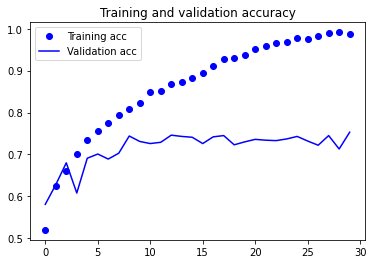

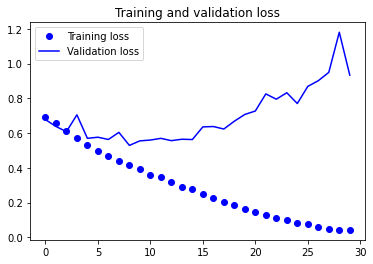

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


#Using Drop out and Data Augmentation as techniques to prevent overfitting 

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))  #random drop out 50%
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# Model Compilation
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

#Let's train the network using both data augmentation and dropout:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

#validation data should not be augmented
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
#fit the model to the data using the generator
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
100/100 [==============================] - 116s 1s/step - loss: 0.6963 - acc: 0.5037 - val_loss: 0.6897 - val_acc: 0.5200
Epoch 2/100
100/100 [==============================] - 120s 1s/step - loss: 0.6875 - acc: 0.5476 - val_loss: 0.6643 - val_acc: 0.6140
Epoch 3/100
100/100 [==============================] - 119s 1s/step - loss: 0.6772 - acc: 0.5749 - val_loss: 0.6496 - val_acc: 0.6240
Epoch 4/100
100/100 [==============================] - 118s 1s/step - loss: 0.6646 - acc: 0.5953 - val_loss: 0.6420 - val_acc: 0.6190
Epoch 5/100
100/100 [==============================] - 117s 1s/step - loss: 0.6444 - acc: 0.6199 - val_loss: 0.6426 - val_acc: 0.6010
Epoch 6/100
100/100 [==============================] - 118s 1s/step - loss: 0.6357 - acc: 0.6318 - val_loss: 0.6921 - val_acc: 0.6070
Epoch 7/100
100/100 [==============================] - 122s 1s/step - loss: 0.6130 - acc: 0.6651 - val_loss: 0.5986 - val_acc: 0.6620
Epoch 8/100
100/100 [==============================] - 123s 1s

In [ ]:
model.save('cats_and_dogs_small_2.h5')

We can see how training and validation accuracy are very close ( 84% and 79.4% respectively). 

Let's use Matplotlib to plot accuracy and loss for both training and validation after adding more training data


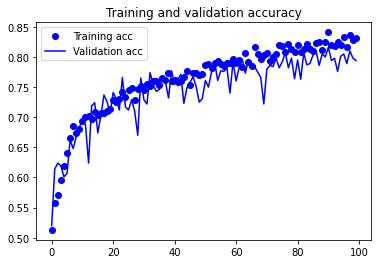

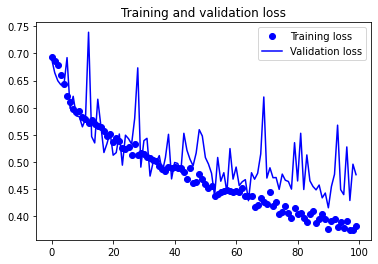

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


#Inceasing training sample

Here we increase training sample by adding 800 more pictures of cats and dogs, No changes in the size of Validation and test data. (486 cat images, 314 dog images)

In [ ]:
#Adding more data points (800 images to training data)
base_dir = '/content/gdrive/MyDrive/Colab Notebooks/cats_and_dogs_small'
AddTrain = '/content/gdrive/MyDrive/Colab Notebooks/biggertrain'
!ls '/content/gdrive/MyDrive/Colab Notebooks/biggertrain'

train


In [ ]:
# Directories for our new training. validation and test splits stay the same
train_dir = os.path.join(AddTrain, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))


total training cat images: 1486
total training dog images: 1314
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


In [ ]:
#Building the network with more training data
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# Model Compilation
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2800 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
#fit the model to the data using the generator
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 [==============================] - 996s 10s/step - loss: 0.7022 - acc: 0.5104 - val_loss: 0.6787 - val_acc: 0.6240
Epoch 2/30
100/100 [==============================] - 213s 2s/step - loss: 0.6700 - acc: 0.6061 - val_loss: 0.6580 - val_acc: 0.5990
Epoch 3/30
100/100 [==============================] - 100s 999ms/step - loss: 0.6360 - acc: 0.6519 - val_loss: 0.6283 - val_acc: 0.6440
Epoch 4/30
100/100 [==============================] - 86s 862ms/step - loss: 0.5948 - acc: 0.6900 - val_loss: 0.6097 - val_acc: 0.6710
Epoch 5/30
100/100 [==============================] - 84s 842ms/step - loss: 0.5657 - acc: 0.7130 - val_loss: 0.5921 - val_acc: 0.6820
Epoch 6/30
100/100 [==============================] - 84s 842ms/step - loss: 0.5445 - acc: 0.7205 - val_loss: 0.5605 - val_acc: 0.7070
Epoch 7/30
100/100 [==============================] - 84s 839ms/step - loss: 0.5253 - acc: 0.7417 - val_loss: 0.5843 - val_acc: 0.6870
Epoch 8/30
100/100 [==============================] - 84s

In [ ]:
model.save('cats_and_dogs_small_3.h5')


Let's plot our results after increaing training data:

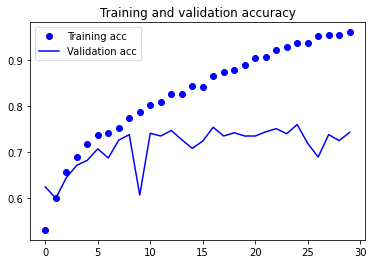

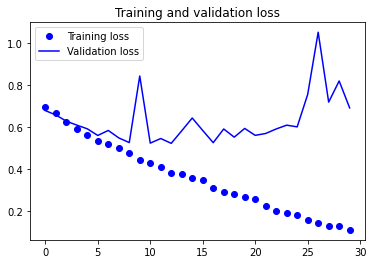

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#Adding more Training data

Here we increase training sample of dogs and cats to total of 4000. No changes in validation and test data.

In [ ]:
#Adding more data points (1300 images to training data)
base_dir = '/content/gdrive/MyDrive/Colab Notebooks/cats_and_dogs_small'
AddTrain2= '/content/gdrive/MyDrive/Colab Notebooks/finaltrain'
!ls '/content/gdrive/MyDrive/Colab Notebooks/finaltrain'

train


In [ ]:
# Directories for our new training. validation and test splits stay the same
train_dir = os.path.join(AddTrain2, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))


total training cat images: 2000
total training dog images: 2000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


In [ ]:
#Building the network with more training data
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# Model Compilation
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 4000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
#fit the model to the data using the generator
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,     
      validation_data=validation_generator,
      validation_steps=50)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 [==============================] - 1074s 11s/step - loss: 0.6857 - acc: 0.5395 - val_loss: 0.6603 - val_acc: 0.6420
Epoch 2/30
100/100 [==============================] - 269s 3s/step - loss: 0.6627 - acc: 0.6110 - val_loss: 0.6310 - val_acc: 0.6580
Epoch 3/30
100/100 [==============================] - 152s 2s/step - loss: 0.6257 - acc: 0.6565 - val_loss: 0.5970 - val_acc: 0.6920
Epoch 4/30
100/100 [==============================] - 105s 1s/step - loss: 0.6031 - acc: 0.6765 - val_loss: 0.5641 - val_acc: 0.7220
Epoch 5/30
100/100 [==============================] - 90s 897ms/step - loss: 0.5747 - acc: 0.7015 - val_loss: 0.5371 - val_acc: 0.7400
Epoch 6/30
100/100 [==============================] - 88s 875ms/step - loss: 0.5624 - acc: 0.7180 - val_loss: 0.5249 - val_acc: 0.7380
Epoch 7/30
100/100 [==============================] - 86s 856ms/step - loss: 0.5342 - acc: 0.7295 - val_loss: 0.5092 - val_acc: 0.7490
Epoch 8/30
100/100 [==============================] - 85s 848

In [ ]:
model.save('cats_and_dogs_small_4.h5')

Increasing training sample to 4000 images has resulted in very good results compared to earlier models we built so far. Training accuracy is 91% and validation accuracy is pretty close with 89% . Let's plot the results: 

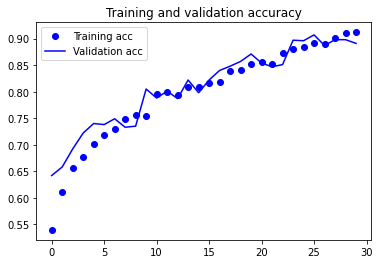

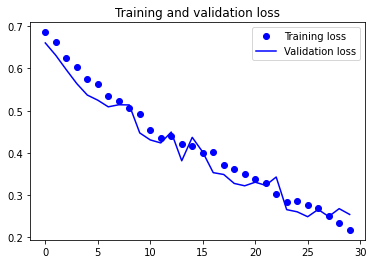

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#Using a pretrained network:

We will use the VGG16 architecture by  recording the output of conv_base on our data and using these outputs as inputs to a new model. First, we will use it with the original dataset we used at the beginning (2000 training data, 1000 validation, 1000 test)

In [ ]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

conv_base.summary()

58892288/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
______________________________________________________________

In [ ]:
#We will start by running instances of the previously-introduced ImageDataGenerator to extract images and their labels as Numpy arrays.
#Then We will extract features from these images simply by calling the predict method of the conv_base model.
base_dir = '/content/gdrive/MyDrive/Colab Notebooks/cats_and_dogs_small'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))   #The final feature map has shape (4, 4, 512), on top of which we will stick a densely-connected classifier
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            # Note that since generators yield data indefinitely in a loop,
            # we must `break` after every image has been seen once.
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


The extracted features are currently of shape (samples, 4, 4, 512). We will feed them to a densely-connected classifier, so first we must flatten them to (samples, 8192):

In [ ]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))


In [ ]:
#Building the network 
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))  #random drop put of 50%
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

#let's fit the model
history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Epoch 1/30
100/100 [==============================] - 2s 20ms/step - loss: 0.6409 - acc: 0.6329 - val_loss: 0.4457 - val_acc: 0.8230
Epoch 2/30
100/100 [==============================] - 2s 18ms/step - loss: 0.4404 - acc: 0.8037 - val_loss: 0.3694 - val_acc: 0.8580
Epoch 3/30
100/100 [==============================] - 2s 18ms/step - loss: 0.3653 - acc: 0.8410 - val_loss: 0.3250 - val_acc: 0.8800
Epoch 4/30
100/100 [==============================] - 2s 18ms/step - loss: 0.3057 - acc: 0.8828 - val_loss: 0.3020 - val_acc: 0.8880
Epoch 5/30
100/100 [==============================] - 2s 18ms/step - loss: 0.2726 - acc: 0.8960 - val_loss: 0.2899 - val_acc: 0.8930
Epoch 6/30
100/100 [==============================] - 2s 17ms/step - loss: 0.2853 - acc: 0.8787 - val_loss: 0.2804 - val_acc: 0.8920
Epoch 7/30
100/100 [==============================] - 2s 18ms/step - loss: 0.2459 - acc: 0.9055 - val_loss: 0.2773 - val_acc: 0.8940
Epoch 8/30
100/100 [==============================] - 2s 17ms/step - 

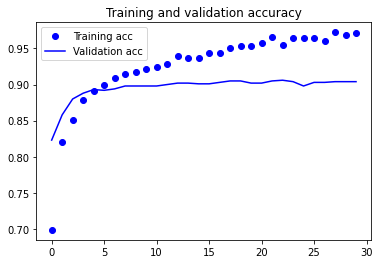

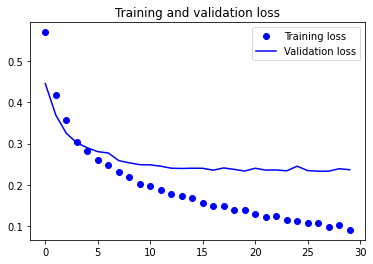

In [ ]:
#Let's take a look at the loss and accuracy curves during training:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Now We will use the pre-trained network with a bigger training set (2800 training data, 1000 validation, 1000 test)


In [ ]:
# Directories for our new training. validation and test splits stay the same
AddTrain = '/content/gdrive/MyDrive/Colab Notebooks/biggertrain'

train_dir = os.path.join(AddTrain, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))   #The final feature map has shape (4, 4, 512), on top of which we will stick a densely-connected classifier
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            # Note that since generators yield data indefinitely in a loop,
            # we must `break` after every image has been seen once.
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 2800)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)


Found 2800 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
train_features = np.reshape(train_features, (2800, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

#Building the network 
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))  #random drop put of 50%
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

#let's fit the model
history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Epoch 1/30
140/140 [==============================] - 3s 19ms/step - loss: 0.6680 - acc: 0.6222 - val_loss: 0.4095 - val_acc: 0.8370
Epoch 2/30
140/140 [==============================] - 2s 17ms/step - loss: 0.4214 - acc: 0.8022 - val_loss: 0.3372 - val_acc: 0.8720
Epoch 3/30
140/140 [==============================] - 2s 17ms/step - loss: 0.3418 - acc: 0.8601 - val_loss: 0.3049 - val_acc: 0.8880
Epoch 4/30
140/140 [==============================] - 2s 17ms/step - loss: 0.3142 - acc: 0.8652 - val_loss: 0.2839 - val_acc: 0.8930
Epoch 5/30
140/140 [==============================] - 2s 17ms/step - loss: 0.2828 - acc: 0.8865 - val_loss: 0.2690 - val_acc: 0.8980
Epoch 6/30
140/140 [==============================] - 2s 17ms/step - loss: 0.2547 - acc: 0.8995 - val_loss: 0.2760 - val_acc: 0.8850
Epoch 7/30
140/140 [==============================] - 2s 17ms/step - loss: 0.2396 - acc: 0.9075 - val_loss: 0.2618 - val_acc: 0.8920
Epoch 8/30
140/140 [==============================] - 2s 17ms/step - 

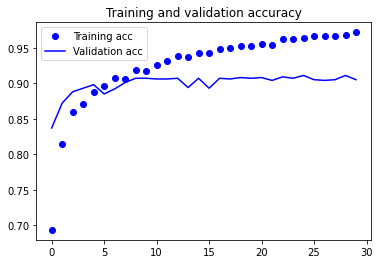

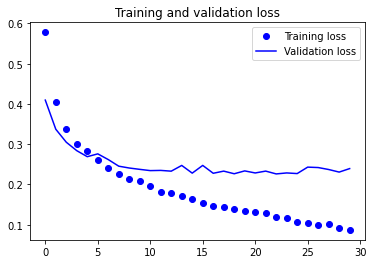

In [ ]:
#Let's take a look at the loss and accuracy curves during training:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show() 

Now We will use the pre-trained network with a bigger training set (4000 training data, 1000 validation, 1000 test)

In [ ]:
AddTrain2= '/content/gdrive/MyDrive/Colab Notebooks/finaltrain'
# Directories for our new training. validation and test splits stay the same
train_dir = os.path.join(AddTrain2, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))   #The final feature map has shape (4, 4, 512), on top of which we will stick a densely-connected classifier
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            # Note that since generators yield data indefinitely in a loop,
            # we must `break` after every image has been seen once.
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 4000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 4000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:

train_features = np.reshape(train_features, (4000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

In [ ]:
#Building the network 
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))  #random drop put of 50%
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])


In [ ]:
#let's fit the model
history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Epoch 1/30
200/200 [==============================] - 6s 27ms/step - loss: 0.6368 - acc: 0.6187 - val_loss: 0.3574 - val_acc: 0.8570
Epoch 2/30
200/200 [==============================] - 5s 27ms/step - loss: 0.3770 - acc: 0.8382 - val_loss: 0.2881 - val_acc: 0.8860
Epoch 3/30
200/200 [==============================] - 5s 26ms/step - loss: 0.3012 - acc: 0.8739 - val_loss: 0.2527 - val_acc: 0.8980
Epoch 4/30
200/200 [==============================] - 6s 29ms/step - loss: 0.2781 - acc: 0.8867 - val_loss: 0.2322 - val_acc: 0.9080
Epoch 5/30
200/200 [==============================] - 6s 28ms/step - loss: 0.2558 - acc: 0.8912 - val_loss: 0.2130 - val_acc: 0.9200
Epoch 6/30
200/200 [==============================] - 5s 26ms/step - loss: 0.2240 - acc: 0.9131 - val_loss: 0.1991 - val_acc: 0.9240
Epoch 7/30
200/200 [==============================] - 5s 26ms/step - loss: 0.2206 - acc: 0.9135 - val_loss: 0.1882 - val_acc: 0.9340
Epoch 8/30
200/200 [==============================] - 5s 25ms/step - 

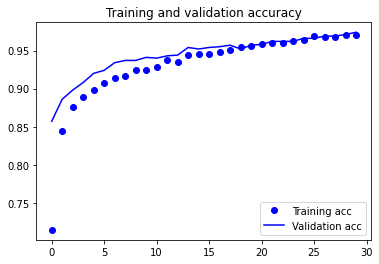

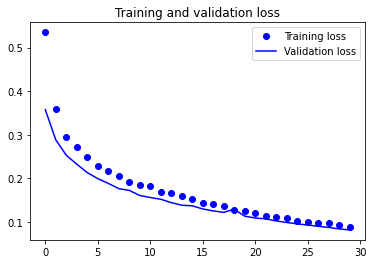

In [ ]:
#Let's take a look at the loss and accuracy curves during training:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show() 

#Results' Summary :

In [ ]:
results = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Convnet Results.xlsx', dtype=None)
results

,Model & training size,Training Loss,Training accuracy,Validation Loss,Validation Accuracy
0,Original Model (2000 training sample),0.0416,0.9830,0.9336,0.753
1,Original Model after applying Dropout and Dat...,0.3700,0.8382,0.4768,0.794
2,Increasing training sample to 2800,0.0990,0.9651,0.6914,0.743
3,Increaing training sample to 4000,0.2179,0.9120,0.2545,0.891
4,Using pretrained convnet with Original sample,0.0919,0.9687,0.2366,0.904
5,Using pretrained convnet with 2000 training sa...,0.0854,0.9763,0.2394,0.905
6,Using pretrained convnet with 4000 training sa...,0.0827,0.9721,0.0813,0.974



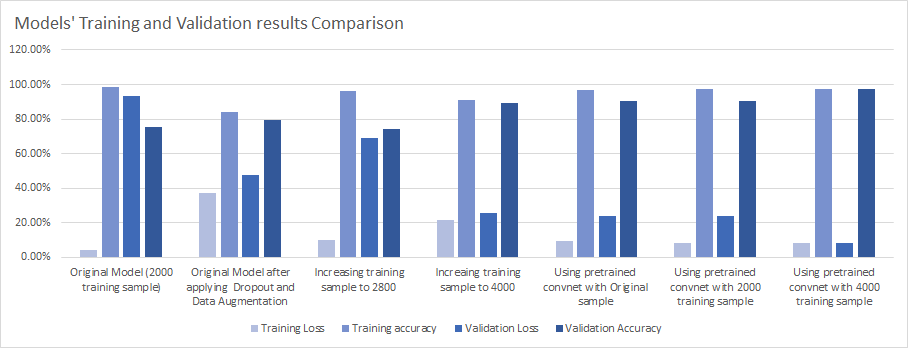



1.   Dropout and Data Augmentation are good techniques to prevent overfitting. Data Augmentation is a powerful technique when working with small image dataset. In our data, after implemting both techniques training accuracy dropped but validtion accuracy increased to a percentage close to the accuracy on training. 
2.   Most importantly, Increasing training sample can do much better results. When we increased our training sample from 2000 to 2800, the model was still overfitting. However, when the sample was increased to 4000, the model didn't seem to overfit and the accuracy on training and validation were 91% and 89% respectively. 
3. Out of all models we build, a pretrained network gave the best the results even with the original training sample size. Increasing the training sample increased both the accuracy and the loss on training and validtion datasets. With a 4000 training sample, we achieved accuracy of 97.2% on training and 97.4% on validation with training loss of 0.082  on training and 0.081 on validation. 

